<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/dense_associative_memory_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing data (irrelevant)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image

response = requests.get("https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py")

if response.status_code == 200:
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")

response = requests.get("https://github.com/kebabee/ML-assiociative-memory/raw/08eb242de52b29dd9ae769b8bb4af3714a884bab/letters/letters.zip")

if response.status_code == 200:
    zip_content = BytesIO(response.content)
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        zip_ref.extractall('letters')
    print("Letters extraction successful.")
else:
    print("Failed to download the zip file.")


import hopfield_header as hopf

def bipolar_letter_load(adress):
  return np.where(np.array(Image.open(adress))[:,:,0]<128,1,-1).reshape(-1)

letters = []

letters.append(bipolar_letter_load('letters/1.png'))
letters.append(bipolar_letter_load('letters/2.png'))
letters.append(bipolar_letter_load('letters/3.png'))
letters.append(bipolar_letter_load('letters/4.png'))
letters.append(bipolar_letter_load('letters/5.png'))
letters.append(bipolar_letter_load('letters/6.png'))
letters.append(bipolar_letter_load('letters/7.png'))
letters.append(bipolar_letter_load('letters/8.png'))
letters.append(bipolar_letter_load('letters/9.png'))
letters.append(bipolar_letter_load('letters/A.png'))
letters.append(bipolar_letter_load('letters/B.png'))
letters.append(bipolar_letter_load('letters/C.png'))
letters.append(bipolar_letter_load('letters/D.png'))
letters.append(bipolar_letter_load('letters/E.png'))
letters.append(bipolar_letter_load('letters/F.png'))
letters.append(bipolar_letter_load('letters/G.png'))
letters.append(bipolar_letter_load('letters/H.png'))
letters.append(bipolar_letter_load('letters/I.png'))
letters.append(bipolar_letter_load('letters/J.png'))
letters.append(bipolar_letter_load('letters/K.png'))
letters.append(bipolar_letter_load('letters/L.png'))
letters.append(bipolar_letter_load('letters/M.png'))
letters.append(bipolar_letter_load('letters/N.png'))
letters.append(bipolar_letter_load('letters/O.png'))
letters.append(bipolar_letter_load('letters/P.png'))
letters.append(bipolar_letter_load('letters/Q.png'))
letters.append(bipolar_letter_load('letters/R.png'))
letters.append(bipolar_letter_load('letters/S.png'))
letters.append(bipolar_letter_load('letters/T.png'))
letters.append(bipolar_letter_load('letters/U.png'))
letters.append(bipolar_letter_load('letters/W.png'))
letters.append(bipolar_letter_load('letters/X.png'))
letters.append(bipolar_letter_load('letters/Y.png'))
letters.append(bipolar_letter_load('letters/Z.png'))
letters.append(bipolar_letter_load('letters/?.png'))
letters.append(bipolar_letter_load('letters/@.png'))
letters.append(bipolar_letter_load('letters/&.png'))
letters.append(bipolar_letter_load('letters/#.png'))
letters.append(bipolar_letter_load('letters/%.png'))
letters.append(bipolar_letter_load('letters/$.png'))
letters.append(bipolar_letter_load('letters/eu.png'))
letters.append(bipolar_letter_load('letters/inf.png'))
letters.append(bipolar_letter_load('letters/pi.png'))
letters.append(bipolar_letter_load('letters/ps.png'))
letters.append(bipolar_letter_load('letters/se.png'))
letters.append(bipolar_letter_load('letters/si.png'))
letters.append(bipolar_letter_load('letters/sm.png'))
letters.append(bipolar_letter_load('letters/us.png'))
letters.append(bipolar_letter_load('letters/al.png'))

noised_data = []
noised_data1 = letters.copy()

for i in range(len(letters)):
    noised_data.append(hopf.noise(letters[i], 40))

network1 = hopf.hopfield_net(256)
network1.set_patterns(letters)

hopfield_header.py downloaded successfully.
Letters extraction successful.


# Dense associative memory

Classic Hopfield network is working only with small number of patterns relative to number of neurons. Way improving capacity is new energy function of dense associative memory:

$$E = -\sum^S_{\mu=1} (\sum_i x_i^\mu \xi_i)^n$$
where *n* is integer. With *n=2* it is just classic Hopfield network model.

Neuron update is based on a question "Is it beneficial to reduce energy for me to change my state?". In math way:
$$\xi_i = sgn[E(\xi_i=1) - E(\xi_i = -1)]$$
With implicit energy equation it is:
$$\xi_i = sgn[\sum_{\mu=1}^S(x_i^\mu + \sum_{j \neq i}x_j^\mu \xi_j)^n - (-x_i^\mu + \sum_{j \neq i}x_j^\mu \xi_j)]$$

This new equation increases capacity so much so that it exceeds the number of neurons.

Consider 49 patterns:

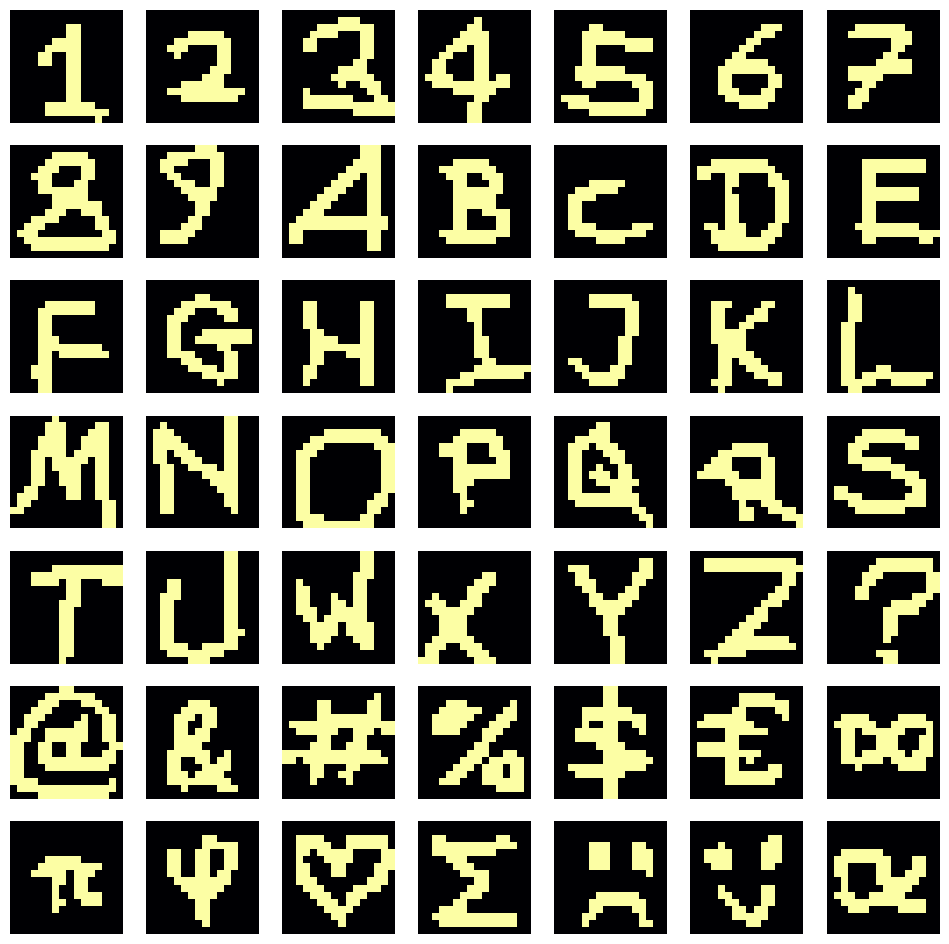

In [8]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(network1.patterns)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(network1.patterns[i].reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Distorted images of patterns is test dataset:

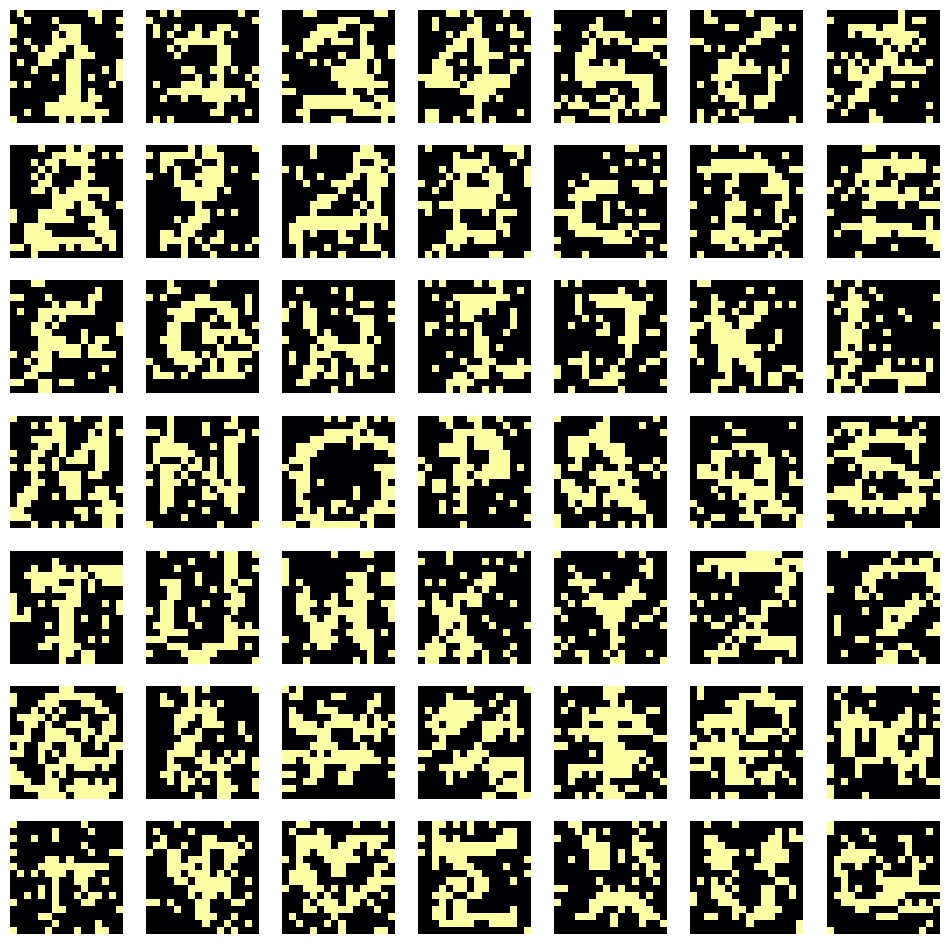

In [9]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(noised_data[i].reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Now results of new model:

Iteration 0, energy: 92.19142234807455
Iteration 1, energy: 92.19142234807455
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: 29.530134277840773
Iteration 1, energy: 29.530134277840773
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: 33.56746939985517
Iteration 1, energy: 33.56746939985517
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: 133.3581657067279
Iteration 1, energy: 133.3581657067279
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -126.19616332567645
Iteration 1, energy: -126.19616332567645
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -58.947603914322855
Iteration 1, energy: -58.947603914322855
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -4.260064172102876
Iteration 1, energy: -4.260064172102876
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -137.8923733325185
Iteration 1, energy: -137.89237

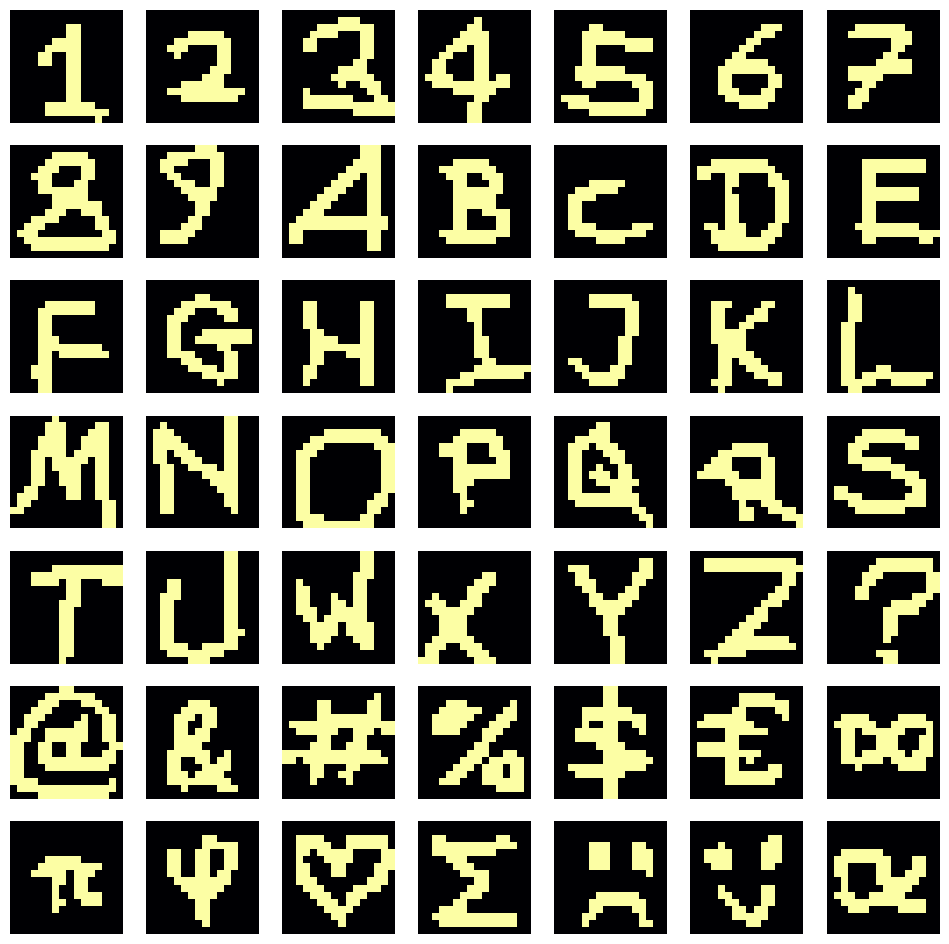

In [10]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data)):
  result = network1.dense_mem_test(noised_data[i],20,8)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

It takes quite a lot of time but patterns were recalled perfectly.

Harder task, second test dataset is set of patterns with 68.75% of neurons cut:

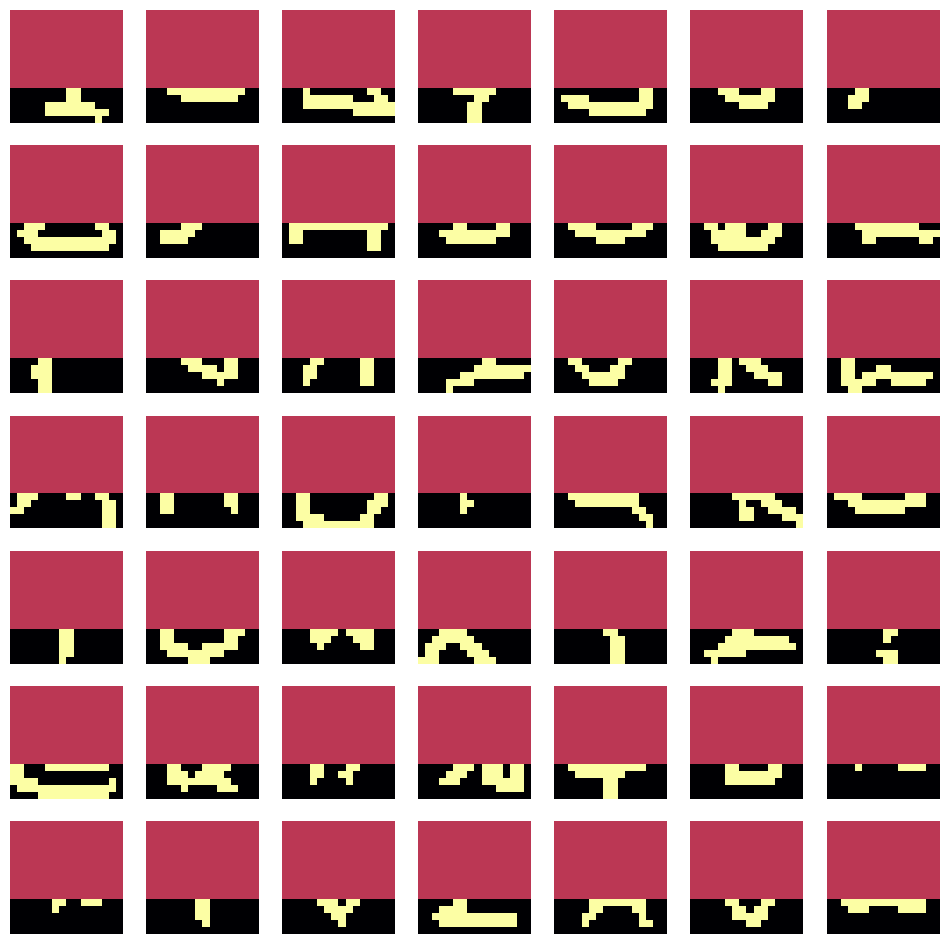

In [11]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(hopf.cut(noised_data1[i],176).reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Network results:

Iteration 0, energy: 92.19142234807455
Iteration 1, energy: 92.19142234807455
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: 29.530134277840773
Iteration 1, energy: 29.530134277840773
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: 33.56746939985517
Iteration 1, energy: 33.56746939985517
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: 147.56531378545873
Iteration 1, energy: 133.3581657067279
Iteration 2, energy: 133.3581657067279
Completed in 2 iterations (network stable), error: 0
Iteration 0, energy: -126.19616332567645
Iteration 1, energy: -126.19616332567645
Completed in 1 iterations (network stable), error: 0
Iteration 0, energy: -59.02490065184685
Iteration 1, energy: -58.947603914322855
Iteration 2, energy: -58.947603914322855
Completed in 2 iterations (network stable), error: 0
Iteration 0, energy: 31.515892199287364
Iteration 1, energy: -4.260064172102876
Iteration 2, energy: -4.260064172102876
Comp

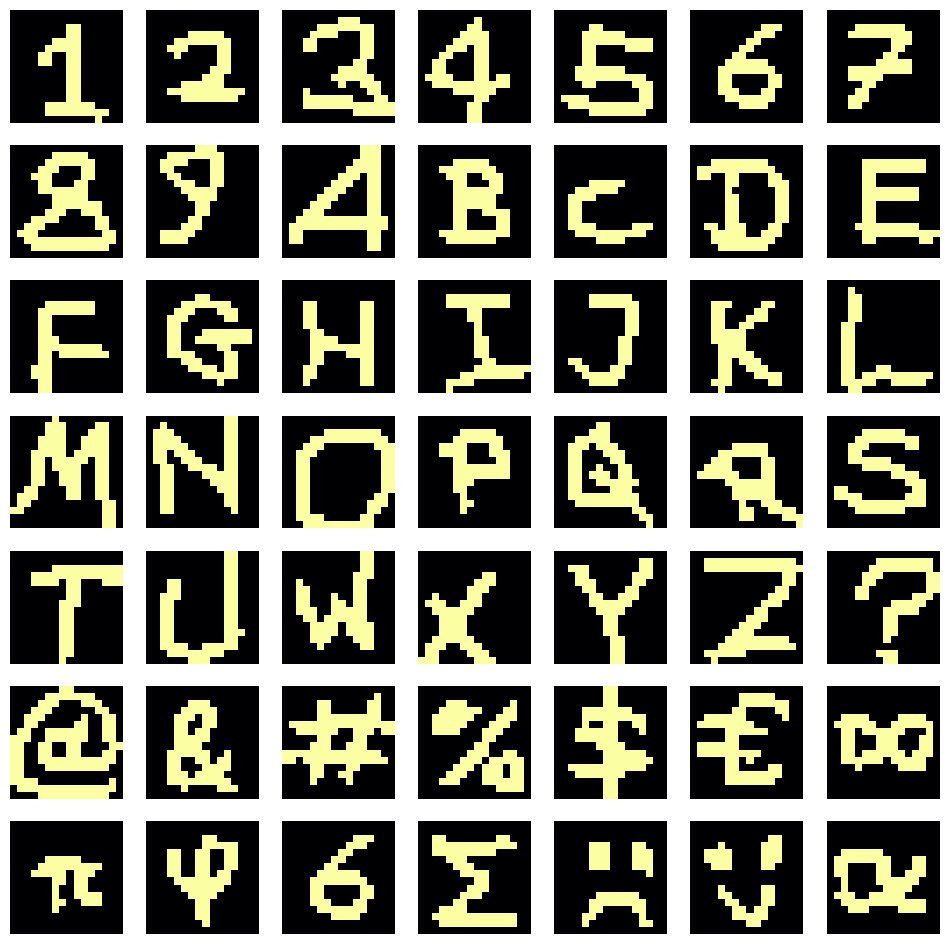

In [12]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  result = network1.dense_mem_test(hopf.cut(noised_data1[i],176),20,8)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

This time patterns were perfectly recalled too.